1.主成分分析的步骤：
        1.根据研究问题选取初始分析变量；
        2.根据初始变量特性判断由协方差阵求主成分还是由相关阵求主成分（数据标准化的话需要用系数相关矩阵，数据未标准化则用协方差阵）；
        3.求协差阵或相关阵的特征根与相应标准特征向量；
        4.判断是否存在明显的多重共线性，若存在，则回到第一步；
        5.主成分分析的适合性检验
        6.得到主成分的表达式并确定主成分个数，选取主成分；
        7.结合主成分对研究问题进行分析并深入研究。


2.部分说明
    一组数据是否可以用主成分分析，必须做适合性检验。可以用球形检验和KMO统计量检验。
 （1）球形检验（Bartlett)
        球形检验的假设：
                H0：相关系数矩阵为单位阵（即变量不相关）
                H1：相关系数矩阵不是单位阵（即变量间有相关关系）


（2）KMO（Kaiser-Meyer-Olkin)统计量
        KMO统计量比较样本相关系数与样本偏相关系数，它用于检验样本是否适于作主成分分析。
        KMO的值在0,1之间，该值越大，则样本数据越适合作主成分分析和因子分析。一般要求该值大于0.5，方可作主成分分析或者相关分析。
        Kaiser在1974年给出了经验原则：
                0.9以上       适合性很好
                0.8~0.9        适合性良好
                0.7~0.8        适合性中等
                0.6~0.7        适合性一般
                0.5~0.6        适合性不好
                0.5以下       不能接受的

# 1.导入库

In [102]:
# 数据处理
import pandas as pd
import numpy as np

# 绘图
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 2. 数据导入

In [103]:
df = pd.read_csv('D:\M\MATLAB Driver/forward\eleven\data_base.csv')
df

,年龄,性别,婚姻状况,教育程度,月收入状况（退休金、养老金等总和）,每次旅居养老的预算范围,年出游次数(次),次出游时长(天),退休前工作的单位性质,帮忙照看第三代(孙子，孙女),出游方式,身体状况,自理状况,我的月收入水平很高,我的经济状况很好,旅居养老意愿
0,74,1,2,2,1570,2,1,1,3,1,3,4,5,2,2,2
1,79,1,2,1,1579,1,1,1,3,1,2,4,5,2,2,2
2,69,2,2,1,1946,1,2,1,5,2,1,4,5,2,2,2
3,89,2,2,4,11558,6,12,2,1,1,1,5,5,4,4,2
4,83,1,2,2,1326,1,2,1,3,2,2,4,5,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,79,1,2,3,5127,3,1,2,4,2,2,3,4,4,4,1
270,87,2,2,3,7053,3,8,3,1,2,1,4,5,5,5,2
271,86,1,2,1,492,1,1,1,7,2,1,3,3,2,2,1
272,86,1,2,3,3197,4,2,3,2,2,3,5,3,4,5,2


# 3.进行球状检验
    检验总体变量的相关矩阵是否是单位阵（相关系数矩阵对角线的所有元素均为1,所有非对角线上的元素均为零）；即检验各个变量是否各自独立。

In [104]:
# Bartlett's球状检验
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(chi_square_value, p_value)

1097.1742288347823 1.8811331193671388e-157


## p值<0.05时，说明各变量间具有相关性，因子分析有效。

 # 4.KMO检验
 检查变量间的相关性和偏相关性，取值在0-1之间；KOM统计量越接近1，变量间的相关性越强，偏相关性越弱，因子分析的效果越好。

In [105]:
# 通常取值从0.6开始进行因子分析
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print(kmo_all)

[0.49808299 0.47517541 0.63141034 0.83168805 0.83537071 0.83038974
 0.80889768 0.83068261 0.8166205  0.55249828 0.4956257  0.60112352
 0.57534874 0.7519545  0.77346194 0.77498236]


## Kaiser在1974年给出了经验原则：
                0.9以上       适合性很好
                0.8~0.9        适合性良好
                0.7~0.8        适合性中等
                0.6~0.7        适合性一般
                0.5~0.6        适合性不好
                0.5以下       不能接受的

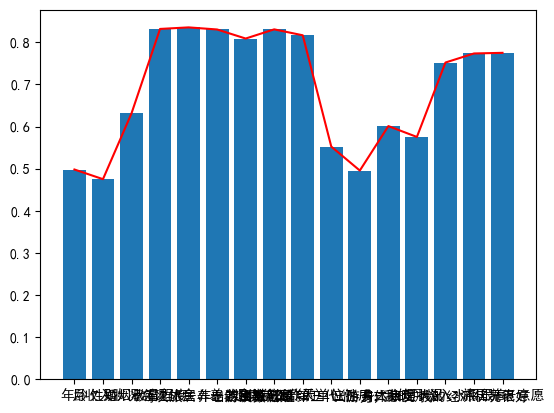

In [106]:
plt.bar(df.columns,kmo_all)
plt.plot(df.columns,kmo_all,color='r')

# 5.求相关矩阵
## （1）数据标准化做法
### 1.进行标准化 ,用到了 preprocessing 库

In [107]:
from sklearn import preprocessing
df = preprocessing.scale(df)
#设置df的列名
df = pd.DataFrame(df,columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16'])
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0,-0.602446,-0.776105,-0.447358,-0.665481,-1.289752,-0.708166,-0.767052,-1.370000,0.094360,-1.406507,0.986007,0.145320,0.702253,-1.539226,-1.528454,0.407379
1,-0.006094,-0.776105,-0.447358,-1.713422,-1.286251,-1.457345,-0.767052,-1.370000,0.094360,-1.406507,-0.065222,0.145320,0.702253,-1.539226,-1.528454,0.407379
2,-1.198798,1.288485,-0.447358,-1.713422,-1.143470,-1.457345,-0.404060,-1.370000,1.420242,0.710981,-1.116451,0.145320,0.702253,-1.539226,-1.528454,0.407379
3,1.186610,1.288485,-0.447358,1.430401,2.596072,2.288552,3.225856,-0.066597,-1.231522,-1.406507,-1.116451,1.316432,0.702253,0.290483,0.470574,0.407379
4,0.470987,-0.776105,-0.447358,-0.665481,-1.384680,-1.457345,-0.404060,-1.370000,0.094360,0.710981,-0.065222,0.145320,0.702253,-2.454080,-1.528454,0.407379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,-0.006094,-0.776105,-0.447358,0.382460,0.094096,0.041013,-0.767052,-0.066597,0.757301,0.710981,-0.065222,-1.025791,-0.485509,0.290483,0.470574,-2.454718
270,0.948069,1.288485,-0.447358,0.382460,0.843405,0.041013,1.773890,1.236806,-1.231522,0.710981,-1.116451,0.145320,0.702253,1.205337,1.470088,0.407379
271,0.828799,-0.776105,-0.447358,-1.713422,-1.709148,-1.457345,-0.767052,-1.370000,2.746124,0.710981,-1.116451,-1.025791,-1.673271,-1.539226,-1.528454,-2.454718
272,0.828799,-0.776105,-0.447358,0.382460,-0.656769,0.790193,-0.404060,1.236806,-0.568581,0.710981,0.986007,1.316432,-1.673271,0.290483,1.470088,0.407379


 ### 2.求相关系数矩阵

In [108]:
covX = np.around(np.corrcoef(df.T),decimals=3)
#设置covX的行列名
covX = pd.DataFrame(covX,columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16'])
covX.index = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16']
covX

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
x1,1.000,0.001,-0.121,0.047,0.033,0.032,-0.050,-0.105,-0.104,0.008,-0.029,-0.079,-0.115,0.017,0.078,-0.131
x2,0.001,1.000,0.206,-0.074,-0.010,0.060,-0.018,-0.003,0.018,-0.070,-0.011,-0.037,0.133,-0.085,-0.041,0.014
x3,-0.121,0.206,1.000,-0.213,-0.100,0.068,-0.041,-0.067,0.171,-0.212,0.189,-0.009,0.118,-0.163,-0.208,-0.040
x4,0.047,-0.074,-0.213,1.000,0.547,0.406,0.273,0.170,-0.252,-0.069,-0.080,0.231,0.217,0.302,0.378,0.194
x5,0.033,-0.010,-0.100,0.547,1.000,0.614,0.397,0.381,-0.213,-0.094,-0.003,0.274,0.243,0.513,0.476,0.194
x6,0.032,0.060,0.068,0.406,0.614,1.000,0.411,0.331,-0.192,-0.139,0.112,0.209,0.166,0.388,0.380,0.218
x7,-0.050,-0.018,-0.041,0.273,0.397,0.411,1.000,0.310,-0.123,-0.192,-0.014,0.124,0.049,0.216,0.194,0.093
x8,-0.105,-0.003,-0.067,0.170,0.381,0.331,0.310,1.000,-0.148,0.007,0.071,-0.052,-0.061,0.441,0.378,0.204
x9,-0.104,0.018,0.171,-0.252,-0.213,-0.192,-0.123,-0.148,1.000,-0.129,0.067,-0.068,-0.035,-0.229,-0.293,-0.232
x10,0.008,-0.070,-0.212,-0.069,-0.094,-0.139,-0.192,0.007,-0.129,1.000,0.046,0.005,-0.095,0.041,0.052,-0.046


### 3.求解特征值与特征向量

In [109]:
#求解系数相关矩阵的特征值和特征向量
featValue, featVec=  np.linalg.eig(covX.T)
featValue, featVec
#设置featValue的行列名
featValue = pd.DataFrame(featValue,columns=['特征值'])
featValue.index = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16']
featValue


,特征值
x1,3.833387
x2,1.814568
x3,1.484916
x4,1.175917
x5,1.119461
x6,1.061641
x7,0.902055
x8,0.833063
x9,0.231215
x10,0.685694


## （2）数据不标准化做法
### 1.求均值

In [110]:
def meanX(dataX):
    return np.mean(dataX,axis=0)#axis=0表示依照列来求均值。假设输入list,则axis=1
average = meanX(df)
average

x1    -4.862291e-16
x2    -1.361441e-16
x3    -1.069704e-16
x4     2.074577e-16
x5     3.241527e-17
x6     1.944916e-16
x7    -1.944916e-17
x8    -6.483054e-17
x9     5.186443e-17
x10    6.483054e-17
x11   -1.361441e-16
x12    2.463561e-16
x13   -4.927121e-16
x14   -7.779665e-17
x15    1.296611e-17
x16    2.917374e-16
dtype: float64

### 2.查看列数和行数

In [111]:
m, n = np.shape(df)
m,n

(274, 16)

### 3.写出同数据集一样的均值矩阵

In [112]:
data_adjust = []
avgs = np.tile(average, (m, 1))
avgs

array([[-4.86229062e-16, -1.36144137e-16, -1.06970394e-16, ...,
        -7.77966499e-17,  1.29661083e-17,  2.91737437e-16],
       [-4.86229062e-16, -1.36144137e-16, -1.06970394e-16, ...,
        -7.77966499e-17,  1.29661083e-17,  2.91737437e-16],
       [-4.86229062e-16, -1.36144137e-16, -1.06970394e-16, ...,
        -7.77966499e-17,  1.29661083e-17,  2.91737437e-16],
       ...,
       [-4.86229062e-16, -1.36144137e-16, -1.06970394e-16, ...,
        -7.77966499e-17,  1.29661083e-17,  2.91737437e-16],
       [-4.86229062e-16, -1.36144137e-16, -1.06970394e-16, ...,
        -7.77966499e-17,  1.29661083e-17,  2.91737437e-16],
       [-4.86229062e-16, -1.36144137e-16, -1.06970394e-16, ...,
        -7.77966499e-17,  1.29661083e-17,  2.91737437e-16]])

### 4.对数据集进行去中心化

In [113]:
data_adjust = df - avgs
data_adjust

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0,-0.602446,-0.776105,-0.447358,-0.665481,-1.289752,-0.708166,-0.767052,-1.370000,0.094360,-1.406507,0.986007,0.145320,0.702253,-1.539226,-1.528454,0.407379
1,-0.006094,-0.776105,-0.447358,-1.713422,-1.286251,-1.457345,-0.767052,-1.370000,0.094360,-1.406507,-0.065222,0.145320,0.702253,-1.539226,-1.528454,0.407379
2,-1.198798,1.288485,-0.447358,-1.713422,-1.143470,-1.457345,-0.404060,-1.370000,1.420242,0.710981,-1.116451,0.145320,0.702253,-1.539226,-1.528454,0.407379
3,1.186610,1.288485,-0.447358,1.430401,2.596072,2.288552,3.225856,-0.066597,-1.231522,-1.406507,-1.116451,1.316432,0.702253,0.290483,0.470574,0.407379
4,0.470987,-0.776105,-0.447358,-0.665481,-1.384680,-1.457345,-0.404060,-1.370000,0.094360,0.710981,-0.065222,0.145320,0.702253,-2.454080,-1.528454,0.407379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,-0.006094,-0.776105,-0.447358,0.382460,0.094096,0.041013,-0.767052,-0.066597,0.757301,0.710981,-0.065222,-1.025791,-0.485509,0.290483,0.470574,-2.454718
270,0.948069,1.288485,-0.447358,0.382460,0.843405,0.041013,1.773890,1.236806,-1.231522,0.710981,-1.116451,0.145320,0.702253,1.205337,1.470088,0.407379
271,0.828799,-0.776105,-0.447358,-1.713422,-1.709148,-1.457345,-0.767052,-1.370000,2.746124,0.710981,-1.116451,-1.025791,-1.673271,-1.539226,-1.528454,-2.454718
272,0.828799,-0.776105,-0.447358,0.382460,-0.656769,0.790193,-0.404060,1.236806,-0.568581,0.710981,0.986007,1.316432,-1.673271,0.290483,1.470088,0.407379


### 5.计算协方差阵

In [114]:
covX = np.cov(data_adjust.T)   #计算协方差矩阵
covX

array([[ 1.00366300e+00,  6.64974071e-04, -1.21225287e-01,
         4.72068992e-02,  3.29011142e-02,  3.23269808e-02,
        -5.05231560e-02, -1.05184484e-01, -1.03979599e-01,
         8.04908758e-03, -2.93328915e-02, -7.89276753e-02,
        -1.15574973e-01,  1.65652026e-02,  7.79864451e-02,
        -1.31302751e-01],
       [ 6.64974071e-04,  1.00366300e+00,  2.06267995e-01,
        -7.45659282e-02, -9.61014499e-03,  6.02760874e-02,
        -1.82643380e-02, -2.59019175e-03,  1.83525521e-02,
        -7.07175182e-02, -1.10546002e-02, -3.73660066e-02,
         1.33820650e-01, -8.50694484e-02, -4.16292786e-02,
         1.42982731e-02],
       [-1.21225287e-01,  2.06267995e-01,  1.00366300e+00,
        -2.13585933e-01, -1.00360346e-01,  6.87393118e-02,
        -4.15393721e-02, -6.67663958e-02,  1.71274492e-01,
        -2.12290552e-01,  1.89990200e-01, -9.27801840e-03,
         1.17945995e-01, -1.63902847e-01, -2.09222708e-01,
        -3.96991752e-02],
       [ 4.72068992e-02, -7.45659282e

### 6.计算协方差阵的特征值和特征向量

In [115]:
featValue, featVec=  np.linalg.eig(covX)  #求解协方差矩阵的特征值和特征向量
featValue, featVec

(array([3.84742792, 1.82094751, 1.48983973, 1.18037691, 1.12426648,
        1.06516271, 0.9051164 , 0.83620726, 0.23211522, 0.68854238,
        0.64716854, 0.59458465, 0.52214939, 0.44391119, 0.3390375 ,
        0.32175428]),
 array([[-3.54289164e-03, -2.07619943e-01,  8.32974833e-02,
          6.04730725e-01, -1.91596683e-01, -4.34052783e-01,
          9.47199364e-02,  2.84694282e-01,  2.04773704e-02,
         -1.50159955e-01, -4.07540696e-01,  1.51614865e-01,
         -2.01164593e-01, -1.28789444e-01, -3.08581034e-03,
         -1.61906866e-03],
        [ 2.32829903e-02,  2.32328729e-01, -1.63221439e-01,
         -1.48944693e-01, -4.08355303e-01, -5.73362034e-01,
          4.54611215e-02, -5.12162005e-01,  4.85721161e-02,
          2.32357716e-01, -1.16173187e-01, -1.32907397e-01,
          1.64202690e-01, -5.01656623e-02,  4.19504338e-02,
          1.34282895e-01],
        [ 1.03061504e-01,  3.99259261e-01, -3.61580143e-01,
         -1.50350154e-01, -4.17631179e-02, -2.28418633e-01,


# 7.对特征值进行排序并输出  降序

In [116]:
# #对featValue排序
# #将featValue装换成数组
# featValue = np.array(featValue)
# idx = featValue.argsort()[::-1]   
# featValue = featValue[idx]
# featValue = featValue[:,idx]
# featValue

# 8.绘制散点与折线图

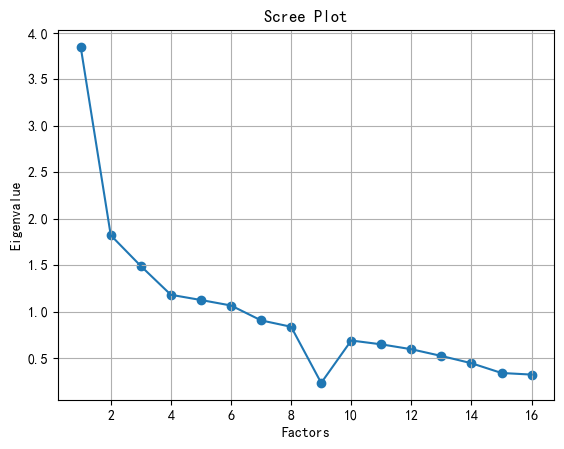

In [117]:
# 同样的数据绘制散点图和折线图
plt.scatter(range(1, df.shape[1] + 1), featValue)
plt.plot(range(1, df.shape[1] + 1), featValue)

# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")

plt.grid()  # 显示网格
plt.show()  # 显示图形

# 9.求特征值的贡献度

In [120]:
gx = featValue/np.sum(featValue)
gx = pd.DataFrame(gx,columns=['特征值'])
gx = gx.sort_values(by='特征值',ascending=False)
gx

,特征值
0,0.239587
1,0.113394
2,0.092775
3,0.073504
4,0.070010
5,0.066330
6,0.056363
7,0.052072
9,0.042877
10,0.040300


# 11.选出主成分

In [ ]:
#选出主成分
gx = gx[gx['特征值']>=0.04]
gx.index


Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x13', 'x14'], dtype='object')

# 12.选出主成分对应的特征向量矩阵

In [ ]:
selectVec = np.matrix(featVec.T[k]).T
selectVe=selectVec*(-1)
selectVec

matrix([[-0.00099213, -0.22557013, -0.05915946, -0.61181951,  0.27669634,
         -0.3051312 , -0.18224363, -0.21319602, -0.06161631,  0.02647873],
        [ 0.02118473,  0.24005019,  0.13907162,  0.11870647,  0.54775084,
         -0.35645808, -0.1836797 ,  0.54963004, -0.03924244, -0.12302182],
        [ 0.1071394 ,  0.41618329,  0.30684374,  0.16698281,  0.15745181,
         -0.22222939, -0.00994829, -0.30637834,  0.01686087, -0.0702368 ],
        [-0.34470006,  0.02410223, -0.11310613, -0.2936563 , -0.03433069,
          0.05196432,  0.13060863,  0.00381858, -0.18862706,  0.06248285],
        [-0.42070714,  0.09159383,  0.13585345, -0.16549845, -0.06041838,
         -0.03143797, -0.11355729,  0.00165265,  0.33153406, -0.51391751],
        [-0.35991814,  0.17039004,  0.25649935, -0.15691992, -0.00807877,
         -0.17989673,  0.09041991,  0.0025688 , -0.09170045,  0.28392315],
        [-0.25006038,  0.07391715,  0.30331163, -0.19303599, -0.15663743,
          0.3076658 ,  0.2242220

# 13.求主成分得分


In [ ]:
finalData = np.dot(data_adjust,selectVec)
finalData

matrix([[ 2.4209078 ,  1.28393227, -0.6370885 , ..., -0.88562954,
         -0.18483807,  0.73897801],
        [ 2.79599772,  0.8427564 , -0.97998419, ..., -0.74321131,
          0.26036682,  0.04065377],
        [ 3.18052426,  1.00476359, -1.28556629, ...,  1.56494394,
          0.25017613, -0.02004693],
        ...,
        [ 4.74881618, -1.33485592,  0.28582927, ...,  0.48633339,
          0.15145956, -0.22246004],
        [-0.93094047, -1.63098954, -0.24377394, ..., -0.88699485,
          0.51375416, -0.4339602 ],
        [ 0.32162336, -1.7405689 ,  0.56706592, ..., -0.96182885,
          1.13087969,  0.85050795]])

# 14.绘制热力图

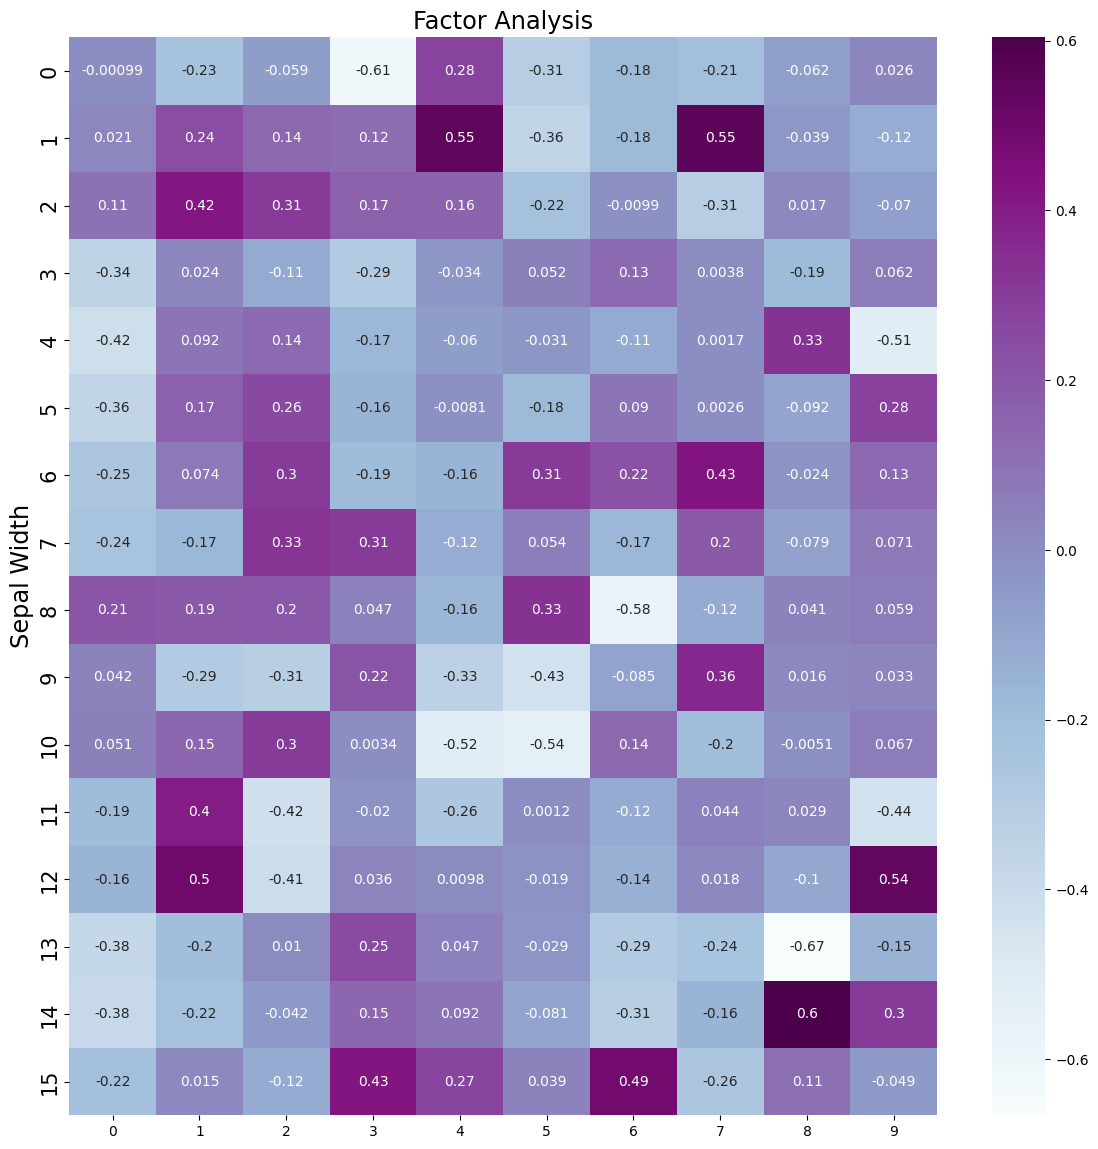

In [ ]:
# 绘图

plt.figure(figsize = (14,14))
ax = sns.heatmap(selectVec, annot=True, cmap="BuPu")

# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")

# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()

# 保存图片
# plt.savefig("factorAnalysis", dpi=500)